# CO2 Emission Prediction Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel("./Data/CO2_Emissions_Canada.xlsx")
pd.DataFrame(data=data)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(7385, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

- There are no NaN values in our data set therefore  will just select the columns we want for our model

In [5]:

columns = [
    'Make',  
    'Vehicle Class', 
    'Engine Size(L)', 
    'Fuel Consumption City (L/100 km)', 
    'Fuel Consumption Hwy (L/100 km)', 
    'Fuel Consumption Comb (L/100 km)', 
    'Transmission', 
    'CO2 Emissions(g/km)'
]

filtered_data = data[columns]


In [6]:
filtered_data.head()

,Make,Vehicle Class,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Transmission,CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,9.9,6.7,8.5,AS5,196
1,ACURA,COMPACT,2.4,11.2,7.7,9.6,M6,221
2,ACURA,COMPACT,1.5,6.0,5.8,5.9,AV7,136
3,ACURA,SUV - SMALL,3.5,12.7,9.1,11.1,AS6,255
4,ACURA,SUV - SMALL,3.5,12.1,8.7,10.6,AS6,244


In [7]:
# Renaming the columns that Have space in their names
filtered_data.columns = [col.replace(' ', '_') for col in filtered_data.columns]
filtered_data.head()


,Make,Vehicle_Class,Engine_Size(L),Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Transmission,CO2_Emissions(g/km)
0,ACURA,COMPACT,2.0,9.9,6.7,8.5,AS5,196
1,ACURA,COMPACT,2.4,11.2,7.7,9.6,M6,221
2,ACURA,COMPACT,1.5,6.0,5.8,5.9,AV7,136
3,ACURA,SUV - SMALL,3.5,12.7,9.1,11.1,AS6,255
4,ACURA,SUV - SMALL,3.5,12.1,8.7,10.6,AS6,244


In [8]:
# Lets see how many unique categories we have for the categorical columns
categorical_columns = ['Make', 'Vehicle_Class', 'Transmission']
unique_counts = filtered_data[categorical_columns].nunique()

print(unique_counts)


Make             42
Vehicle_Class    16
Transmission     27
dtype: int64


- Using one hot encoding for the categorical columns

In [9]:

encoded_data = pd.get_dummies(filtered_data, columns=['Make', 'Vehicle_Class', 'Transmission'], drop_first=True)
encoded_data = encoded_data.astype(int)
final_data = pd.DataFrame(encoded_data)
final_data.head()


,Engine_Size(L),Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),CO2_Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2,9,6,8,196,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,11,7,9,221,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,6,5,5,136,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,12,9,11,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,12,8,10,244,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
final_data.info()
final_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Engine_Size(L)                          7385 non-null   int64
 1   Fuel_Consumption_City_(L/100_km)        7385 non-null   int64
 2   Fuel_Consumption_Hwy_(L/100_km)         7385 non-null   int64
 3   Fuel_Consumption_Comb_(L/100_km)        7385 non-null   int64
 4   CO2_Emissions(g/km)                     7385 non-null   int64
 5   Make_ALFA ROMEO                         7385 non-null   int64
 6   Make_ASTON MARTIN                       7385 non-null   int64
 7   Make_AUDI                               7385 non-null   int64
 8   Make_BENTLEY                            7385 non-null   int64
 9   Make_BMW                                7385 non-null   int64
 10  Make_BUGATTI                            7385 non-null   int64
 11  Make_BUICK       

(7385, 87)

In [29]:

final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

total_samples = final_data.shape[0]
train_size = int(0.6 * total_samples)  # 60% for training
test_size = int(0.2 * total_samples)   # 20% for testing
val_size = total_samples - train_size - test_size  # 20% for validation

#  Split the data
train_data = final_data.iloc[:train_size]  # First 60%
test_data = final_data.iloc[train_size:train_size + test_size]  # Next 20%
val_data = final_data.iloc[train_size + test_size:]  # Last 20%

print(f'Training set size: {train_data.shape}')
print(f'Testing set size: {test_data.shape}')
print(f'Validation set size: {val_data.shape}')

Training set size: (4431, 87)
Testing set size: (1477, 87)
Validation set size: (1477, 87)


In [22]:
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
train_data = train_data.drop_duplicates()




Number of duplicate rows: 1068


# Training the model using vectorization

In [ ]:



#First Prepare the data for training
X_train =test_data.drop(columns=['CO2_Emissions(g/km)']).values  # Features
y_train =test_data['CO2_Emissions(g/km)'].values  # Target variable

# Then we add a column of ones to X to account for the intercept term i.e. bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  

# We calculate weights using the normal equation for efficiency
X_transpose = X_train.T
weights = np.linalg.inv(X_transpose @ X_train) @ X_transpose @ y_train

# Finally we display the calculated weights
print("Weights:", weights)


Weights: [ 84.47964731  14.84665196   5.39335922   0.85535751   3.10115246
  23.95023647  36.35385051  16.69670582  41.6360353   15.12720695
  85.62902722  11.37484684  18.00538597   2.70968899  -0.20123785
   7.07388416  17.60761742   4.47861838  31.21911128  -1.18568991
   5.85614776   6.21000622  17.22127546  16.09264479  13.22702265
   9.18112286  54.19038192  11.5621241   10.87401493  23.35586527
  47.94747055  -6.99594047  19.79345457   7.49085623  17.93986933
  16.58910026  16.6817026   12.52213344  47.89369529   8.98887274
  14.52362122   6.09400871  15.51690069   5.47042035  13.79909982
  11.89253775   2.84940097  -0.3951309   -0.532947    17.36494398
  41.62931046  19.1254914   14.03791246   3.17499256   4.99882852
   4.25549902  15.20328005  22.91033869   6.81677936  28.51622409
  55.93517109  -4.46771105   4.5488367   -7.44518997  10.03224727
  -1.90570545  -4.42785204 -27.8382362  -11.97928889   4.16291657
   2.56282488  23.17041393   5.06170193   9.65252314   8.66450081
 

# Testing the model

In [32]:
X_test = test_data.drop(columns=['CO2_Emissions(g/km)']).values  
y_test = test_data['CO2_Emissions(g/km)'].values  

X_test = np.c_[np.ones(X_test.shape[0]), X_test]  

y_pred = X_test @ weights  


- Comparing predicted emissions versus true values

In [33]:

predicted_df = pd.DataFrame({'Predicted_CO2_Emissions': y_pred})

results_df = pd.concat([test_data.reset_index(drop=True), predicted_df], axis=1)


print(results_df[['CO2_Emissions(g/km)', 'Predicted_CO2_Emissions']].head(10))  


   CO2_Emissions(g/km)  Predicted_CO2_Emissions
0                  328               325.054881
1                  327               315.199473
2                  221               222.865062
3                  251               246.679752
4                  363               355.500119
5                  259               259.553259
6                  212               220.034596
7                  214               226.006869
8                  299               297.086844
9                  172               193.852132


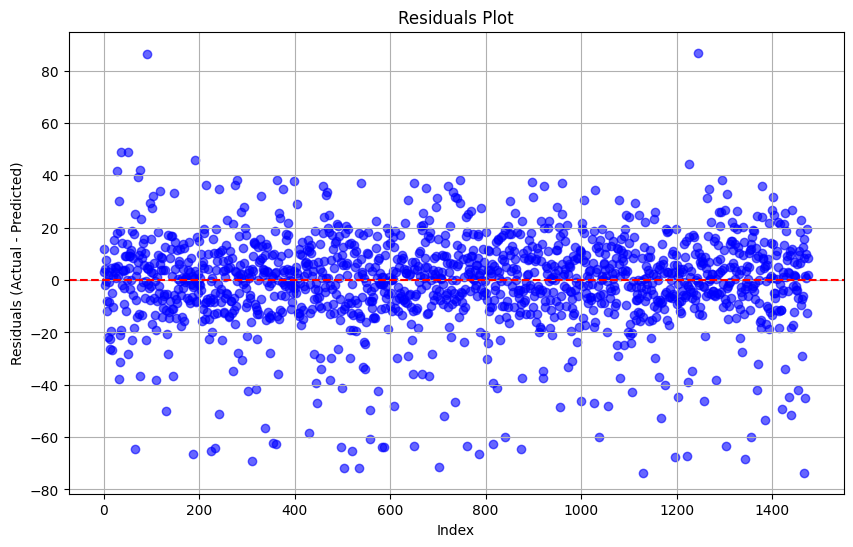

In [34]:

results_df['Residuals'] = results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions']

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Residuals'], color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()


In [ ]:



results_df['Absolute_Error'] = abs(results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions'])

mae = results_df['Absolute_Error'].mean()

print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 12.622762082452418


In [36]:
import pandas as pd

mean_actual = results_df['CO2_Emissions(g/km)'].mean()


SS_tot = ((results_df['CO2_Emissions(g/km)'] - mean_actual) ** 2).sum()


results_df['Residuals'] = results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions']


SS_res = (results_df['Residuals'] ** 2).sum()

R_squared = 1 - (SS_res / SS_tot)

print(f'Coefficient of Determination (R^2): {R_squared}')


Coefficient of Determination (R^2): 0.9049264997664284
